In [7]:
print("Hello world!")

Hello world!


In [8]:
#For and while loops
for i in range(10):
    print(i)
i = 0
while i < 10:
    i += 1
    print(i)
    

0
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10


In [9]:
weight = int(input())
if weight <= 40:
    print("You are anoreksik!!! Go to the eat chicken!!!")
elif weight <= 60:
    print("You are beatiful!!!")
elif weight <= 100:
    print("Your weight so-so!")
else:
    print("You need go to the sport!!!")
    
    

100
Your weight so-so!


In [11]:
#import lib for machine learning
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 1650
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [26]:
#Init tensor for learning
X = torch.tensor([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]], requires_grad=True)
alpha = 0.01
optimizer = torch.optim.SGD([X], alpha)
function = (torch.sin(X) * X ** 2).sum()
# First iteration
function.backward() # Derivative for function
optimizer.step() # Iteration(We need zero grad, becouse grad == sum of all grad)
optimizer.zero_grad() # zero grad

print("Weights:\n", X, "\nWeights second(X.data)\n", X.data) # out weights



Weights:
 tensor([[0.9778, 1.9803, 3.0806],
        [4.1651, 5.0250, 5.6879],
        [6.5386, 7.9348, 9.6638]], requires_grad=True) 
Weights second(X.data)
 tensor([[0.9778, 1.9803, 3.0806],
        [4.1651, 5.0250, 5.6879],
        [6.5386, 7.9348, 9.6638]])


In [27]:
y = torch.tensor([[5., 6., 7., 8.],[12., 13., 16., 18.]], requires_grad=True)
alpha = 0.01
optimizer = torch.optim.SGD([y], alpha)
for i in range(500):
    function = (torch.log( - y + y ** 2) * torch.sin(y)).sum()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()
print(y)

tensor([[ 4.8691,  4.8691,  4.8691, 11.0360],
        [11.0360, 11.0360, 17.2999, 17.2999]], requires_grad=True)


In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(444)

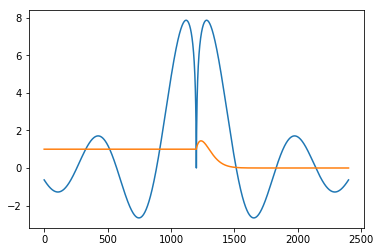

In [112]:
import math
x = [math.sin(float(i/100))*math.log(float(i/100+(100*i/100)**2+3))*1/(1 if i == 0 else i/100) for i in range(-1200, 1201)]
plt.plot(x)
x = [((i/100 if i >=0 else 1)**(-i/100))  for i in range(-1200, 1201)]
plt.plot(x)

In [81]:
import torch


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure



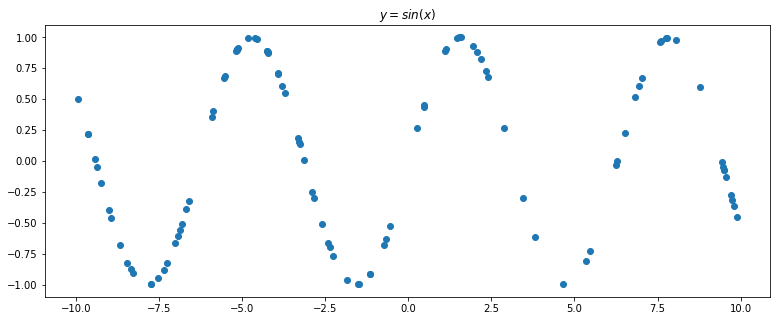

In [17]:
#Train dataset
figure(figsize=(13.0, 5.0))
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

Text(0.5, 1.0, 'Gaussian noise')

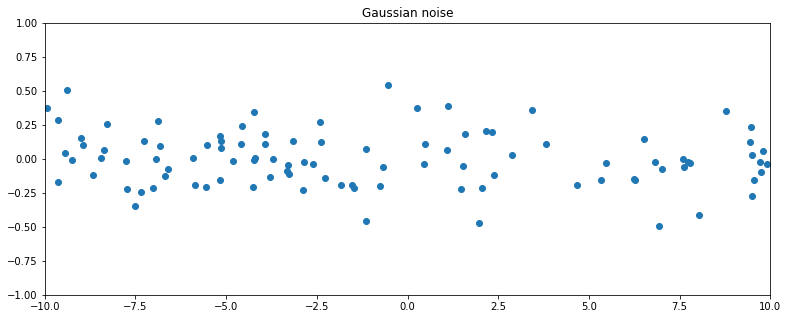

In [18]:
figure(figsize=(13.0, 5.0))
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(),noise.numpy(), 'o')
plt.axis([-10,10, -1, 1])
plt.title('Gaussian noise')

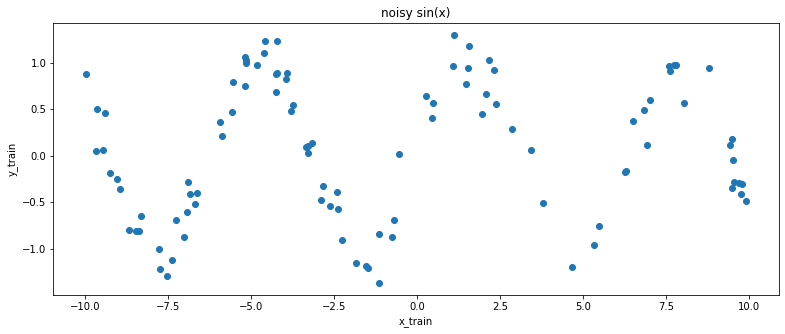

In [19]:
figure(figsize=(13.0, 5.0))
y_train += noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [20]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [21]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1));

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

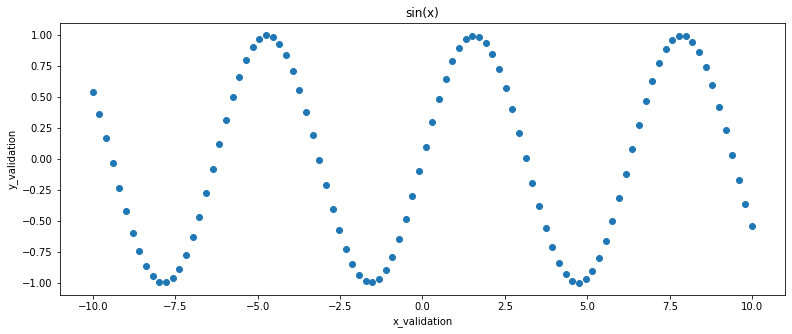

In [22]:
figure(figsize=(13.0, 5.0))
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title("sin(x)")
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [23]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [24]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) # first layer, (input, hidden)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,1 )
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
class SineNet2(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet2, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
    
sine_net = SineNet(50)
sine_net2 = SineNet2(50)

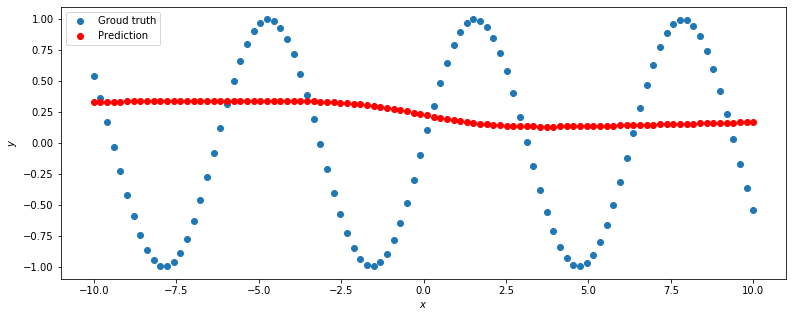

In [25]:
figure(figsize=(13.0, 5.0))
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
predict(sine_net, x_validation, y_validation)

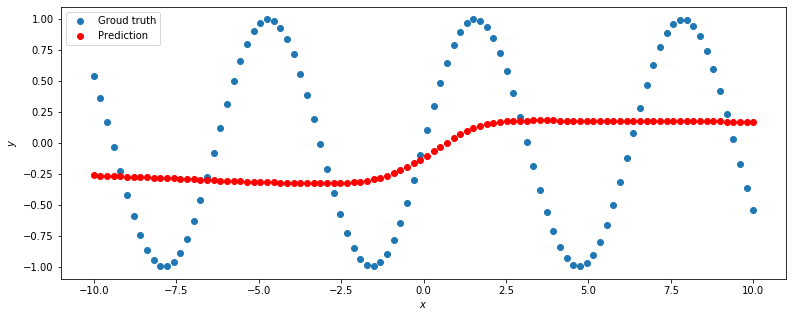

In [26]:
figure(figsize=(13.0, 5.0))
predict(sine_net2, x_validation, y_validation)

# Optimizer 

In [27]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [28]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [29]:
print(list(sine_net.parameters()));

[Parameter containing:
tensor([[ 0.1038],
        [ 0.5339],
        [-0.5724],
        [-0.5309],
        [-0.2945],
        [ 0.6440],
        [ 0.9536],
        [ 0.9811],
        [-0.4435],
        [-0.4487],
        [ 0.0670],
        [-0.4006],
        [-0.4237],
        [-0.0015],
        [-0.0484],
        [-0.8469],
        [-0.4459],
        [-0.9834],
        [ 0.0594],
        [-0.0029],
        [ 0.3568],
        [-0.4050],
        [-0.4093],
        [ 0.9616],
        [ 0.1146],
        [ 0.6838],
        [ 0.1622],
        [ 0.1039],
        [ 0.1285],
        [ 0.9195],
        [ 0.7599],
        [-0.8665],
        [ 0.9682],
        [-0.1507],
        [ 0.0733],
        [-0.1578],
        [ 0.8167],
        [ 0.1969],
        [ 0.7210],
        [-0.2892],
        [ 0.1939],
        [ 0.4155],
        [-0.6849],
        [-0.1788],
        [-0.4892],
        [-0.2358],
        [ 0.2385],
        [ 0.6338],
        [ 0.4682],
        [ 0.1957]], requires_grad=True), Param

# Training procedure

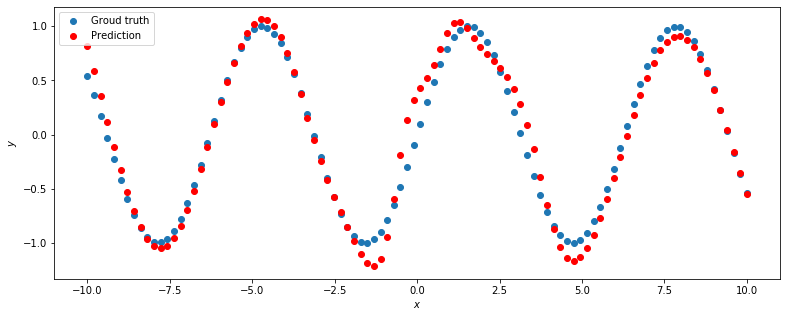

In [30]:
figure(figsize=(13.0, 5.0))
for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    
    loss_val.backward()
    
    optimizer.step()
predict(sine_net, x_validation, y_validation)

0.015913965180516243


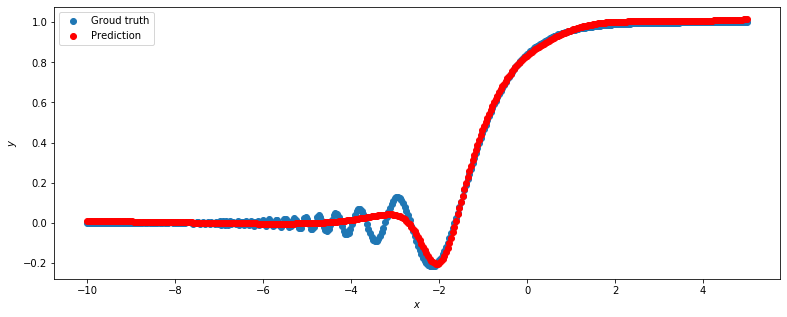

In [33]:
figure(figsize=(13.0, 5.0))
import torch

def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(15)

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 400)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 400)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

def loss(pred, target):
    loss = (pred - target) ** 2
    return loss.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
    
predict(net, x_validation, y_validation)
    
print(metric(net.forward(x_validation), y_validation).item())

In [34]:
figure(figsize=(13.0, 5.0))
class MyNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
    def predict(self, x_validation, y_validation):
        y_pred = self.forward(x_validation)
        plt.plot(x_validation.numpy(), y_validation.numpy(), 'o', label='Groud truth')
        plt.plot(x_validation.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
        plt.legend(loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('$y$')

    def learning_net(self, epoch, x_train, y_train, loss_func):
            self.optimizer = torch.optim.Adam(self.parameters(), lr=0.01)
            for i in range(epoch):
                self.optimizer.zero_grad()
                y_pred = self.forward(x_train)
                loss = loss_func(y_pred, y_train)
                loss.backward()
                self.optimizer.step()

<Figure size 936x360 with 0 Axes>

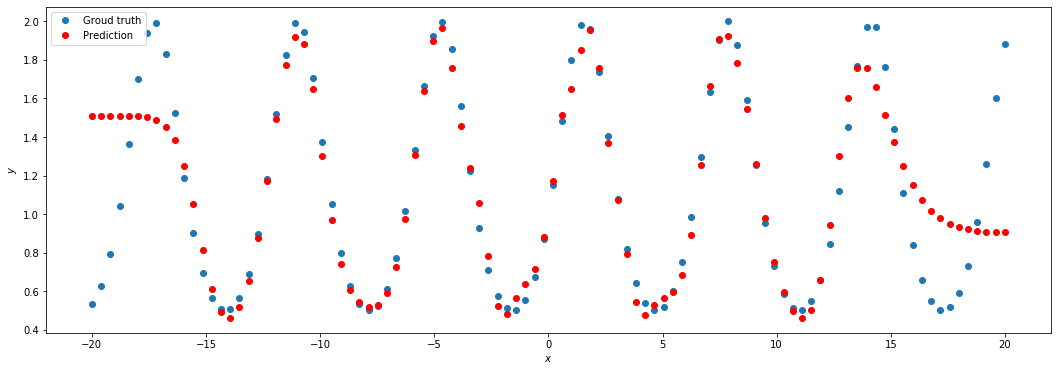

In [36]:
figure(figsize=(18.0, 6.))

def target_function(x):
    return 2**torch.sin(x)

def MSEs(predict, target):
    lossed = (predict - target) ** 2
    return lossed.mean()

#Datasets for learning net

x_validation = torch.linspace(-20, 20, 100)
y_validation = target_function(x_validation)

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

x_train = torch.rand(800)
x_train = x_train * 40 - 20
y_train = target_function(x_train)
y_train += torch.randn(x_train.shape) / 5.

x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

net = MyNet(40)
net.learning_net(6000, x_train, y_train, MSEs)
net.predict(x_validation, y_validation)


In [37]:
#Optimization neural network for recognition numbers

import torch
import random
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [39]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
wine.data[:,:12],
wine.target,
test_size=0.3,
shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [60]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(12, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x
    
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(20)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

In [56]:
np.random.permutation(5)

array([0, 3, 2, 4, 1])

In [61]:
batch_size = 10

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index + batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch)
        
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        
        optimizer.step()
    
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.3148)
tensor(0.9259)
tensor(0.9444)
tensor(0.9444)
tensor(0.9630)
tensor(0.9444)
tensor(0.9630)
tensor(0.9630)
tensor(0.9630)
tensor(0.9630)
tensor(0.9630)
tensor(0.9630)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9815)
tensor(0.9

KeyboardInterrupt: 